In [1]:
import pandas as pd

In [2]:
djia_data= pd.read_csv('HistoricalPrices.csv')

In [3]:
djia_data.head()

,Date,Open,High,Low,Close
0,12/30/22,33121.61,33152.55,32847.82,33147.25
1,12/29/22,33021.43,33293.42,33020.35,33220.80
2,12/28/22,33264.76,33379.55,32869.15,32875.71
3,12/27/22,33224.23,33387.72,33069.58,33241.56
4,12/23/22,32961.06,33226.14,32814.02,33203.93


In [4]:
djia_data.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [5]:
djia_data= djia_data.rename(columns={' Open' : 'Open', ' High' : 'High' , ' Low': 'Low' , ' Close': 'Close'})

In [6]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])

C:\Users\C-DAC\AppData\Local\Temp\ipykernel_18748\115227174.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_data['Date'] = pd.to_datetime(djia_data['Date'])


In [7]:
djia_data= djia_data.sort_values(by = 'Date')

In [8]:
djia_data.head(7)

,Date,Open,High,Low,Close
250,2022-01-03,36321.59,36595.82,36246.45,36585.06
249,2022-01-04,36636.00,36934.84,36636.00,36799.65
248,2022-01-05,36722.60,36952.65,36400.39,36407.11
247,2022-01-06,36409.05,36464.19,36200.68,36236.47
246,2022-01-07,36249.59,36382.84,36111.53,36231.66
245,2022-01-10,36175.21,36175.21,35639.91,36068.87
244,2022-01-11,36058.85,36271.47,35769.38,36252.02


In [9]:
djia_data

,Date,Open,High,Low,Close
250,2022-01-03,36321.59,36595.82,36246.45,36585.06
249,2022-01-04,36636.00,36934.84,36636.00,36799.65
248,2022-01-05,36722.60,36952.65,36400.39,36407.11
247,2022-01-06,36409.05,36464.19,36200.68,36236.47
246,2022-01-07,36249.59,36382.84,36111.53,36231.66
...,...,...,...,...,...
4,2022-12-23,32961.06,33226.14,32814.02,33203.93
3,2022-12-27,33224.23,33387.72,33069.58,33241.56
2,2022-12-28,33264.76,33379.55,32869.15,32875.71
1,2022-12-29,33021.43,33293.42,33020.35,33220.80


In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
from datetime import datetime

In [13]:
# LINE PLOT

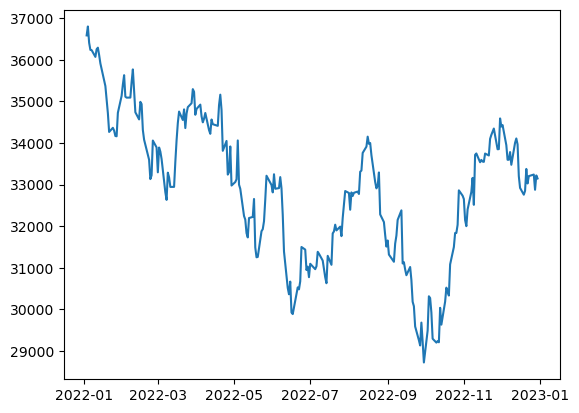

In [14]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()

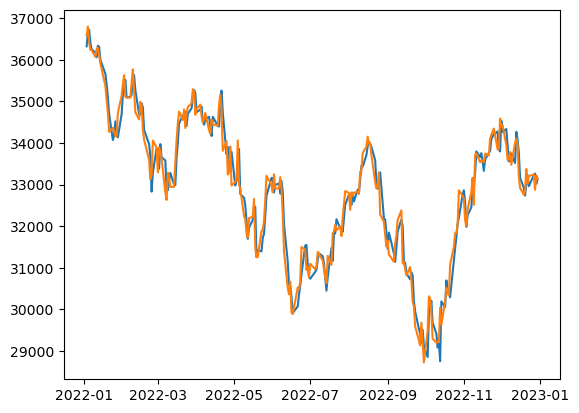

In [15]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()


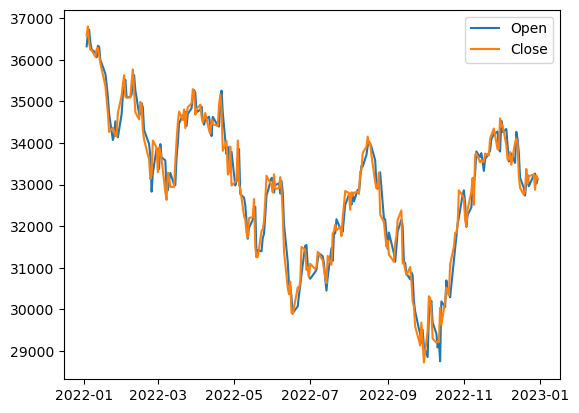

In [16]:
plt.plot(djia_data['Date'], djia_data['Open'], label = 'Open')
plt.plot(djia_data['Date'], djia_data['Close'], label = 'Close')
plt.legend()
plt.show()


In [17]:
# Import the calendar package 
from calendar import month_name

In [18]:
# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])

In [19]:
 # Group metrics by monthly averages
djia_monthly_mean = djia_data \
.groupby('Month') \
.mean() \
.reset_index()
djia_monthly_mean.head(6)


C:\Users\C-DAC\AppData\Local\Temp\ipykernel_18748\3392891787.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,January,2022-01-16 04:48:00.000000000,35498.130500,35740.910500,35145.955000,35456.145000
1,February,2022-02-13 12:37:53.684210432,34687.516316,34906.204211,34362.243684,34648.480526
2,March,2022-03-16 00:00:00.000000000,34007.498261,34270.890870,33752.963478,34029.740435
3,April,2022-04-15 19:12:00.000000000,34392.094500,34640.367500,34078.481000,34314.990000
4,May,2022-05-15 06:51:25.714285824,32364.327143,32668.028095,31996.512857,32379.462857
5,June,2022-06-15 11:25:42.857142784,31526.033333,31755.637143,31188.788095,31446.712857


In [20]:
#Vertical Bar Plots

<function matplotlib.pyplot.show(close=None, block=None)>

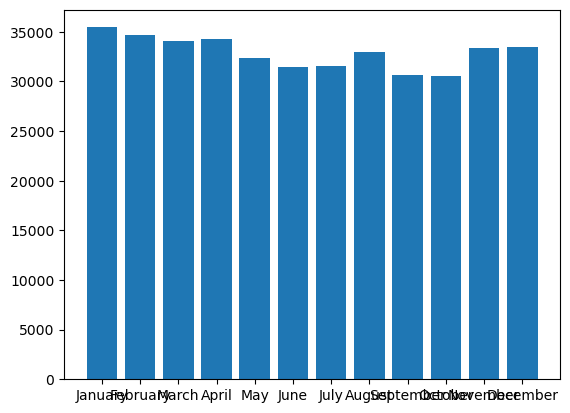

In [21]:
plt.bar(djia_monthly_mean['Month'], height= djia_monthly_mean['Close'])
plt.show

In [22]:
#Reordering Bars in Bar Plots

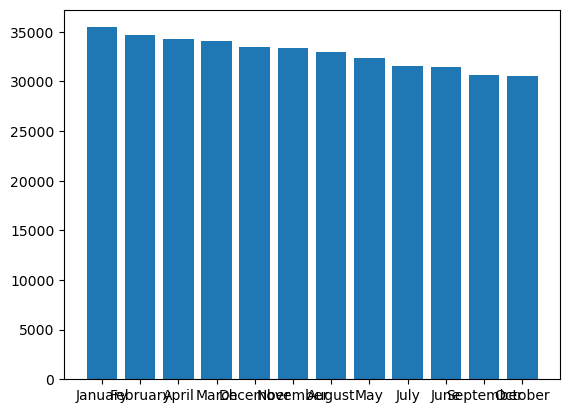

In [23]:
djia_monthly_mean_srtd = djia_monthly_mean.sort_values(by = 'Close', ascending = 
False)
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'])
plt.show()


In [24]:
#HORIZONTAL BAR PLOTS

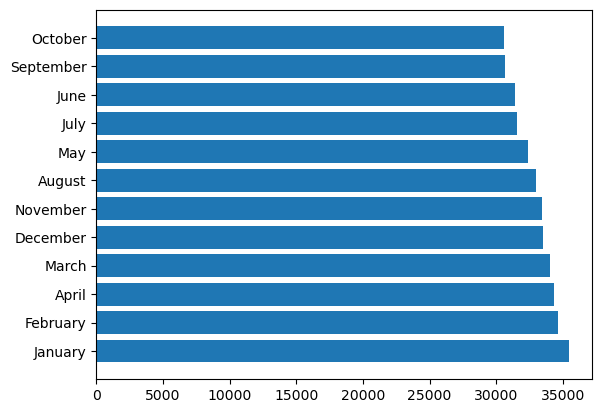

In [25]:
plt.barh(djia_monthly_mean_srtd['Month'], width = djia_monthly_mean_srtd['Close'])
plt.show()


In [26]:
#SCATTER PLOTS

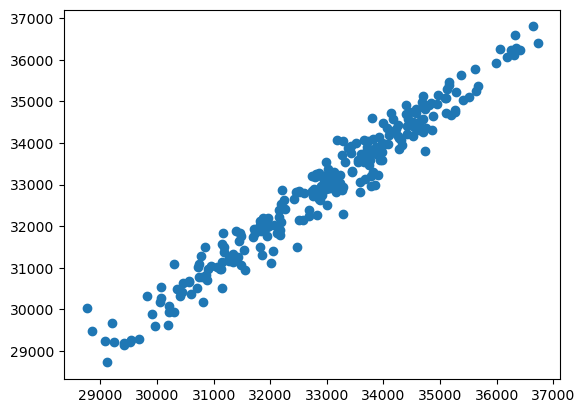

In [27]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

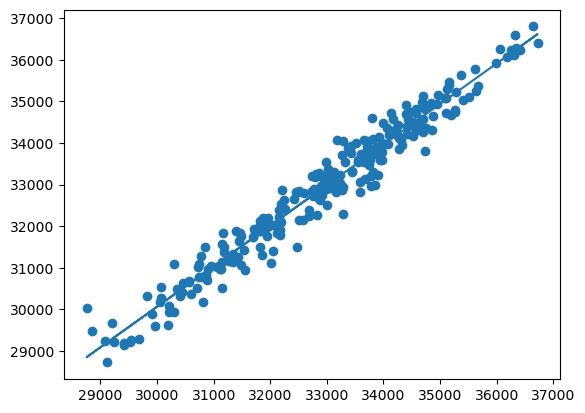

In [28]:
z = np.polyfit(djia_data['Open'], djia_data['Close'], 1)
p = np.poly1d(z)
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.plot(djia_data['Open'], p(djia_data['Open']))
plt.show()

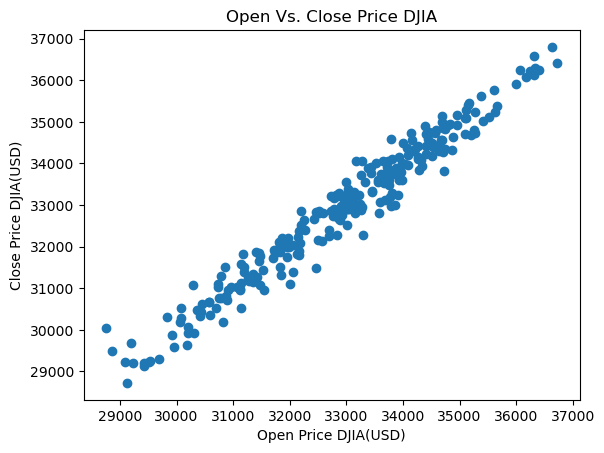

In [29]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.title("Open Vs. Close Price DJIA")
plt.ylabel("Close Price DJIA(USD)")
plt.xlabel("Open Price DJIA(USD)")
plt.show()


In [30]:
# Changing Colors

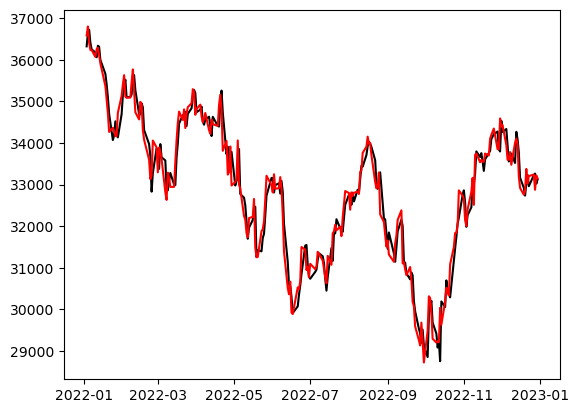

In [31]:
plt.plot(djia_data['Date'], djia_data['Open'], color = 'black')
plt.plot(djia_data['Date'], djia_data['Close'], color = 'red')
plt.show()


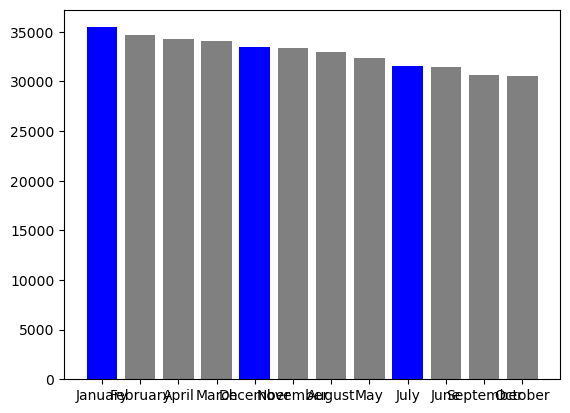

In [32]:
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'], 
color = ['blue', 'gray', 'gray', 'gray'])
plt.show()


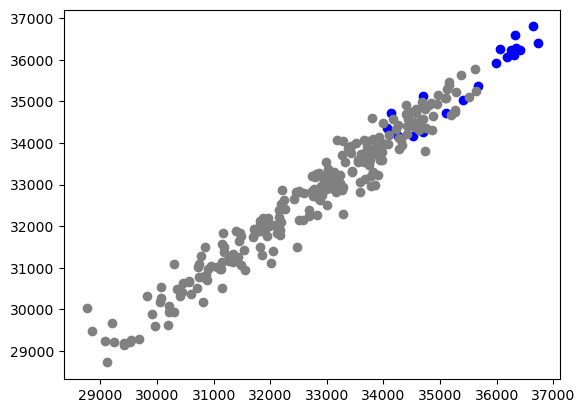

In [33]:
plt.scatter(djia_data[djia_data['Month'] == 'January']['Open'], 
djia_data[djia_data['Month'] == 'January']['Close'], color = 'blue')
plt.scatter(djia_data[djia_data['Month'] != 'January']['Open'], 
djia_data[djia_data['Month'] != 'January']['Close'], color = 'gray')
plt.show()

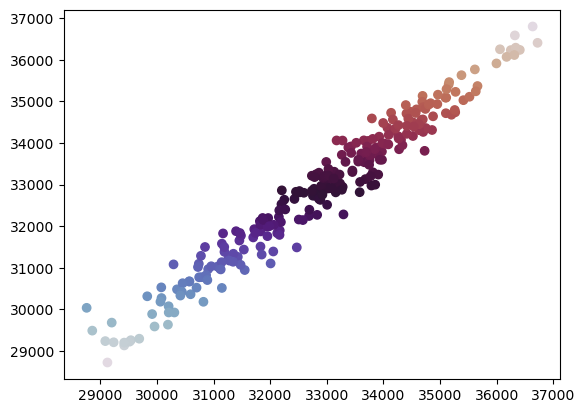

In [48]:
plt.scatter(djia_data['Open'], djia_data['Close'], c=djia_data['Close'], cmap = 
plt.cm.twilight)
plt.show()


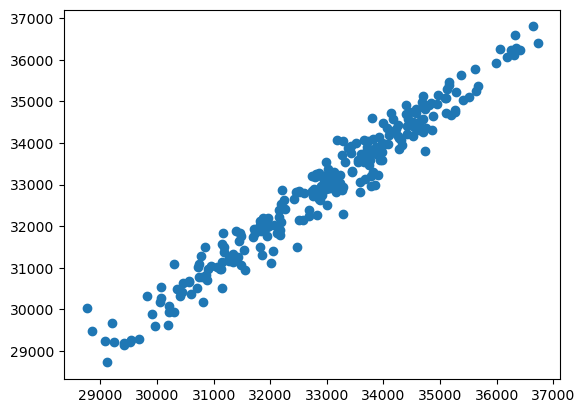

In [49]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.savefig('DJIA 2022 Scatterplot Open vs. Close.png')
